### **What is Machine Learning?**
Machine Learning (ML) is a subfield of artificial intelligence (AI) that enables systems to learn from data and improve their performance over time without being explicitly programmed. It focuses on building algorithms that can automatically detect patterns in data and make decisions or predictions.

---

### **Key Components of Machine Learning**
1. **Data**:
   - The foundation of ML. Data can be structured (tabular data) or unstructured (images, text, etc.).
   - Example: Housing prices, patient health records, customer reviews.

2. **Models**:
   - Mathematical representations of a problem that can learn from data.
   - Example: Linear Regression, Decision Trees, Neural Networks.

3. **Algorithms**:
   - Procedures used to train models by optimizing parameters to minimize error.
   - Example: Gradient Descent, k-Means, Backpropagation.

---

### **Types of Machine Learning**
1. **Supervised Learning**:
   - Learning from labeled data (inputs with corresponding outputs).
   - **Regression**: Predict continuous values.
     - Example: Predicting house prices based on size and location.
   - **Classification**: Predict discrete categories.
     - Example: Identifying whether an email is spam or not.

2. **Unsupervised Learning**:
   - Learning from unlabeled data to discover patterns.
   - **Clustering**: Grouping similar data points.
     - Example: Customer segmentation.
   - **Dimensionality Reduction**: Reducing data features while preserving important information.
     - Example: Principal Component Analysis (PCA).

3. **Reinforcement Learning**:
   - Learning by interacting with the environment and receiving feedback (rewards or penalties).
   - **Policy Optimization**: Learning strategies to maximize cumulative rewards.
     - Example: Training a robot to walk.
   - **Value Function**: Estimating the value of a state in a given policy.

---


## Coding in Python with Libraries for ML

In [1]:
!pip3 install numpy pandas matplotlib scikit-learn jupyter

Dataset Sample:
$   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


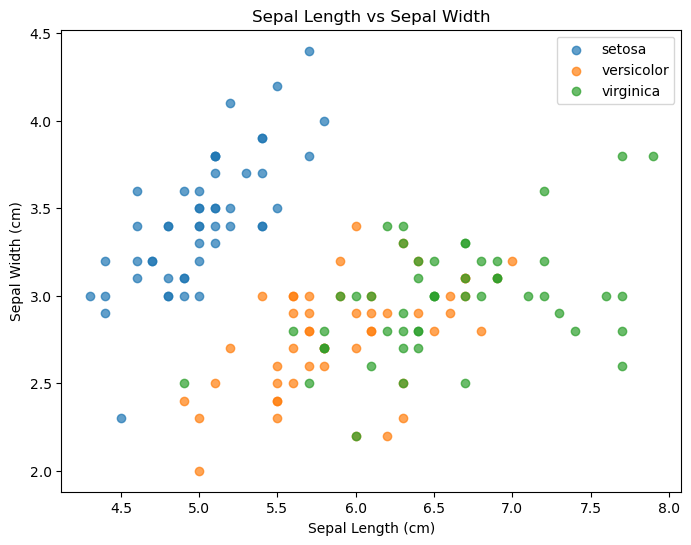

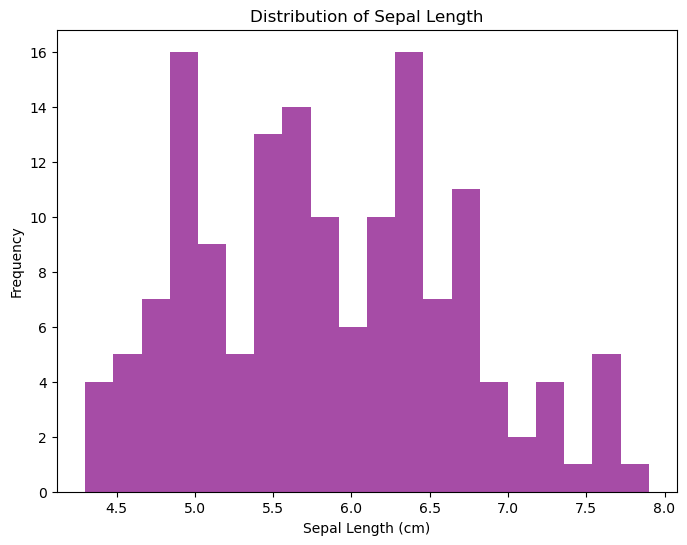

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris Dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target

# Map Target values to Species Name
iris_data['species'] = iris_data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display top few rows
print(f"Dataset Sample:\n${iris_data.head()}")

# Scatter Plot
plt.figure(figsize=(8, 6))
for species, color in zip(iris_data['species'].unique(), ['red', 'green', 'blue']):
    subset = iris_data[iris_data['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species, alpha=0.7)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
iris_data['sepal length (cm)'].plot.hist(bins = 20, alpha=0.7, color='purple')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

## **Data Preprocessing**
Data preprocessing is the process of transforming raw data into a usable and efficient format for machine learning (ML) models. It involves cleaning, transforming, and organizing data to improve the accuracy and efficiency of ML algorithms. Proper preprocessing is the cornerstone of building high-performing models and ensures that data-related issues do not hinder the learning process.

---

## **Importance of Data Preprocessing**
1. **Handles Real-World Data Challenges**: Raw data is often noisy, incomplete, or inconsistent. Preprocessing addresses these issues.
2. **Improves Model Accuracy**: Properly preprocessed data helps models learn meaningful patterns and reduces bias.
3. **Enhances Computational Efficiency**: Preprocessed data reduces the computational load on ML models by standardizing inputs.

---

## **Steps in Data Preprocessing**
### **1. Data Cleaning**
Data cleaning addresses missing values, duplicates, and inconsistencies.

#### **1.1 Handling Missing Values**
Missing data can occur due to errors in data collection or transmission. Common methods include:
- **Mean/Median/Mode Imputation**:
  - Replace missing values with the mean, median, or mode.
  - Formula for mean imputation:
    \[
    x_{\text{new}} = \frac{\sum_{i=1}^{n} x_i}{n}
    \]
    where \( x_i \) are non-missing values, and \( n \) is the count of non-missing values.

- **K-Nearest Neighbors (KNN) Imputation**:
  - Impute missing values based on the average of the nearest neighbors.
  - Distance metric used:
    \[
    d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
    \]
    where \( x \) and \( y \) are data points.

- **Predictive Imputation**:
  - Use a regression or classification model to predict missing values based on other features.

---

### **2. Data Transformation**
Transforming data into a consistent and interpretable format.

#### **2.1 Encoding Categorical Variables**
Categorical data must be converted to numerical values for ML models.
- **One-Hot Encoding**:
  - Convert each category into a binary column.
  - Mathematically, a category \( c_i \) is represented as:
    \[
    o(c_i) = [0, \dots, 1, \dots, 0]
    \]
    where 1 is at the position of \( c_i \).

- **Label Encoding**:
  - Assign a unique integer to each category.
  - Example:
    \[
    \text{Red} \to 0, \text{Blue} \to 1, \text{Green} \to 2
    \]

---

#### **2.2 Feature Scaling**
Scaling ensures all features contribute equally to the model.
- **Min-Max Scaling**:
  - Rescale features to a range [0, 1].
  - Formula:
    \[
    x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
    \]

- **Standardization**:
  - Transform features to have a mean of 0 and standard deviation of 1.
  - Formula:
    \[
    z = \frac{x - \mu}{\sigma}
    \]
    where \( \mu \) is the mean and \( \sigma \) is the standard deviation.

- **Robust Scaling**:
  - Scale features using the median and interquartile range (IQR) to reduce the impact of outliers.
  - Formula:
    \[
    x' = \frac{x - \text{median}(x)}{\text{IQR}}
    \]

---

### **3. Feature Engineering**
Feature engineering involves creating new features or modifying existing ones to improve model performance.

#### **3.1 Polynomial Features**
- Generate higher-order terms to capture non-linear relationships.
- Example: For a feature \( x \), create \( x^2, x^3, \dots, x^n \).

#### **3.2 Interaction Features**
- Combine two or more features to capture interactions.
- Example: For features \( x_1 \) and \( x_2 \), create \( x_1 \cdot x_2 \).

#### **3.3 Log Transformation**
- Apply a logarithmic function to reduce skewness in data.
- Formula:
    \[
    x' = \log(x + 1)
    \]

---

### **4. Outlier Detection and Treatment**
Outliers are extreme values that can skew model predictions.

#### **4.1 Z-Score Method**
- Measure the distance of a value from the mean in terms of standard deviations.
- Formula:
    \[
    z = \frac{x - \mu}{\sigma}
    \]
    where \( z \) is the Z-score, \( \mu \) is the mean, and \( \sigma \) is the standard deviation.

#### **4.2 Interquartile Range (IQR)**
- Identify outliers using the IQR.
- Formula:
    \[
    \text{Outliers} = \{x : x < Q1 - 1.5 \times IQR \, \text{or} \, x > Q3 + 1.5 \times IQR\}
    \]
    where \( Q1 \) and \( Q3 \) are the first and third quartiles.

---

### **5. Data Reduction**
Reducing the dimensionality of data while preserving essential information.

#### **5.1 Principal Component Analysis (PCA)**
- A linear dimensionality reduction technique.
- Formula:
    \[
    X' = XW
    \]
    where \( W \) is the matrix of principal components, and \( X \) is the original data.

#### **5.2 Singular Value Decomposition (SVD)**
- Decompose a matrix into singular vectors and singular values.
- Formula:
    \[
    X = U \Sigma V^T
    \]
    where \( U \) and \( V \) are orthogonal matrices, and \( \Sigma \) is a diagonal matrix.

---

### **6. Dealing with Imbalanced Data**
Class imbalance occurs when one class significantly outweighs another.

#### **6.1 Oversampling**
- Duplicate samples from the minority class.
- Technique: SMOTE (Synthetic Minority Oversampling Technique):
    \[
    x_{\text{new}} = x + \lambda \times (x_{\text{nearest\_neighbor}} - x)
    \]
    where \( \lambda \) is a random number between 0 and 1.

#### **6.2 Undersampling**
- Remove samples from the majority class to balance the dataset.

---

### **7. Feature Selection**
Selecting the most important features to reduce dimensionality and improve interpretability.

#### **7.1 Filter Methods**
- Use statistical measures like correlation or mutual information to rank features.

#### **7.2 Wrapper Methods**
- Evaluate feature subsets using a predictive model.

#### **7.3 Embedded Methods**
- Feature selection is part of the model training process (e.g., LASSO regularization).

---

## **Conclusion**
Data preprocessing is an indispensable step in the ML pipeline. By addressing issues in raw data and transforming it into a suitable format, preprocessing ensures that machine learning models can achieve high accuracy and generalization. Mastery of these techniques lays the foundation for building robust and efficient ML systems.

# <b style="color: yellow">**Linear Regression**</b>

---

## **Introduction**
Linear Regression is one of the simplest and most widely used algorithms in machine learning. It is a **supervised learning** technique used for predicting continuous outcomes based on input features. The relationship between the input variables (features) and the target variable (output) is modeled as a linear equation.

---

## **Mathematical Formulation**

### **1. Hypothesis Function**
The hypothesis function for Linear Regression is:
\[
h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_nx_n
\]
- \( h_\theta(x) \): Predicted value.
- \( \theta_0 \): Intercept (bias term).
- \( \theta_i \): Coefficients (weights) of the features.
- \( x_i \): Input feature values.

For a single feature (\( x \)), this simplifies to:
\[
h_\theta(x) = \theta_0 + \theta_1x
\]

---

### **2. Cost Function**
Linear Regression uses the **Mean Squared Error (MSE)** as the cost function to minimize the error between predicted values and actual values:
\[
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2
\]
- \( J(\theta) \): Cost function.
- \( m \): Number of training examples.
- \( h_\theta(x^{(i)}) \): Predicted value for the \(i^{th}\) example.
- \( y^{(i)} \): Actual target value for the \(i^{th}\) example.

The objective is to find the parameters (\( \theta_0, \theta_1, \dots, \theta_n \)) that minimize \( J(\theta) \).

---

### **3. Optimization Using Gradient Descent**
Gradient Descent is an iterative optimization algorithm to minimize the cost function. The update rule for the parameters is:
\[
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
\]
- \( \alpha \): Learning rate.
- \( \frac{\partial J(\theta)}{\partial \theta_j} \): Partial derivative of the cost function with respect to \( \theta_j \).

For Linear Regression, the gradient is:
\[
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right) x_j^{(i)}
\]

---

## **Graph-Based Explanation**

### **1. Linear Relationship**
Linear Regression assumes that the relationship between input features and the target variable is linear. For a single feature, this can be visualized as:
- A straight line that best fits the data points in a 2D space.

**Graph Example:**
- **X-Axis**: Input feature (\( x \)).
- **Y-Axis**: Target variable (\( y \)).
- The line minimizes the sum of squared vertical distances between data points and the line (error).

---

### **2. Error Visualization**
- **Residuals**: The difference between actual values (\( y \)) and predicted values (\( h_\theta(x) \)).
- The sum of squared residuals determines how well the line fits the data.

**Graph Example:**
- Residuals are represented as vertical lines from each data point to the regression line.

---

### **3. Effect of Parameters (θ_0, θ_1)**
- \( \theta_0 \): Changes the intercept, shifting the line up or down.
- \( \theta_1 \): Changes the slope, adjusting how steeply the line rises or falls.

**Graph Example:**
- Increasing \( \theta_1 \): Line tilts upward.
- Decreasing \( \theta_1 \): Line tilts downward.

---

## **Assumptions of Linear Regression**
1. **Linearity**: The relationship between features and the target is linear.
2. **Independence**: Residuals are independent of each other.
3. **Homoscedasticity**: Residuals have constant variance.
4. **Normality**: Residuals are normally distributed.

---

## **Applications of Linear Regression**
- Predicting house prices based on size and location.
- Estimating stock prices based on historical data.
- Modeling the relationship between advertising budget and sales revenue.

---

## **Conclusion**
Linear Regression is a powerful yet simple model for understanding and predicting relationships in data. It provides clear interpretability and forms the foundation for more complex models. By understanding the mathematics and assumptions, you can apply Linear Regression effectively across various domains.

# <p style="text-decoration: underline">With Libraries</p>

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [14]:
# Load Dataset
california = fetch_california_housing(as_frame=True)
x = california.data
y = california.target

In [16]:
# Split into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Define and Create the Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
# Make Predictions
y_pred = model.predict(x_test)

In [22]:
# Print coefficients anf Intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: -37.02327770606416
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5558915986952444


---

# **Without Libraries: Deriving Parameters Using the Normal Equation**

This section demonstrates how to compute parameters for a Linear Regression model using **matrix algebra** step-by-step, similar to a **pen-and-paper approach**.

---

## **Objective**
Linear Regression aims to find the optimal parameters (`theta`) that minimize the difference between predicted values (`y_pred`) and actual values (`y_actual`). This difference is quantified by a cost function.

The general form of the **cost function** for Linear Regression is:

```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2)
```

Where:
- `m`: Number of training samples.
- `y_pred`: Predicted values, calculated as `X * theta`.
- `y_actual`: Actual target values.

Using calculus, minimizing this cost function results in the **Normal Equation**:

```
theta = (X.T * X)^(-1) * X.T * y
```

---

## **Step-by-Step Explanation**

### **1. Represent the Problem in Matrix Form**
Linear Regression can be represented as:

```
y = X * theta
```

Where:
- `y`: Target values (vector of size `m x 1`).
- `X`: Feature matrix (size `m x (n+1)`), including a column of ones for the intercept.
- `theta`: Parameter vector (size `(n+1) x 1`), which we want to compute.

Example matrices:
```
X = [
    [1, x11, x12, ..., x1n],
    [1, x21, x22, ..., x2n],
    ...
    [1, xm1, xm2, ..., xmn]
]

y = [
    [y1],
    [y2],
    ...
    [ym]
]

theta = [
    [theta0],
    [theta1],
    ...
    [thetan]
]
```

---

### **2. Derive the Normal Equation**

1. **Residual Error**: The difference between actual and predicted values is:
   ```
   Residual = y - X * theta
   ```

2. **Cost Function**: Squaring the residual error and summing it up gives:
   ```
   J(theta) = (y - X * theta).T * (y - X * theta)
   ```

3. **Expand the Cost Function**:
   ```
   J(theta) = y.T * y - 2 * theta.T * X.T * y + theta.T * X.T * X * theta
   ```

4. **Minimizing the Cost Function**: To minimize `J(theta)`, take its derivative with respect to `theta` and set it to zero:
   ```
   d(J(theta)) / d(theta) = -2 * X.T * y + 2 * X.T * X * theta = 0
   ```

5. **Rearranging**:
   ```
   X.T * X * theta = X.T * y
   ```

6. **Solve for theta**:
   ```
   theta = (X.T * X)^(-1) * X.T * y
   ```

---

### **3. Compute Step-by-Step**

Let’s compute `theta` step-by-step using example matrices.

#### Example:
```
X = [
    [1, 2],
    [1, 3],
    [1, 4]
]

y = [
    [6],
    [8],
    [10]
]
```

#### Step 1: Compute `X.T` (Transpose of X)
```
X.T = [
    [1, 1, 1],
    [2, 3, 4]
]
```

#### Step 2: Compute `X.T * X`
```
X.T * X = [
    [1, 1, 1],
    [2, 3, 4]
] * [
    [1, 2],
    [1, 3],
    [1, 4]
]

Result:
X.T * X = [
    [3, 9],
    [9, 29]
]
```

#### Step 3: Compute `X.T * y`
```
X.T * y = [
    [1, 1, 1],
    [2, 3, 4]
] * [
    [6],
    [8],
    [10]
]

Result:
X.T * y = [
    [24],
    [68]
]
```

#### Step 4: Compute `(X.T * X)^(-1)` (Inverse of X.T * X)
```
(X.T * X)^(-1) = inverse([
    [3, 9],
    [9, 29]
])

Result:
(X.T * X)^(-1) = (1 / 6) * [
    [29, -9],
    [-9, 3]
]
```

#### Step 5: Compute `theta`
```
theta = (X.T * X)^(-1) * (X.T * y)

theta = [
    [4.833, -1.5],
    [-1.5, 0.5]
] * [
    [24],
    [68]
]

Result:
theta = [
    [2],
    [2]
]
```

---

### **Final Result**
- Intercept (`theta0`): 2
- Slope (`theta1`): 2

The Linear Regression model becomes:
```
y = 2 + 2x
```

This equation can now be used to make predictions.

---

### **Conclusion**
The Normal Equation provides a direct way to compute the parameters for Linear Regression without iterative optimization. While it is efficient for small datasets, for large datasets, iterative methods like Gradient Descent are more practical.

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [33]:
# Load Dataset
california = fetch_california_housing(as_frame=True)
x = california.data
y = california.target

In [34]:
# Add bias term (intercept) to the feature matrix
x_b = np.c_[np.ones((x.shape[0], 1)), x]

In [35]:
# Split into Training and Testing
train_size = int(0.8 * len(x_b))
x_train, x_test = x_b[:train_size], x_b[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [36]:
# Compute theta (parameters) using Normal Equation
# theta = (x.T * x)^(-1) * x.T * y
theta_best = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
print(f"Theta Best: {theta_best}")

Theta Best: [-3.63905103e+01  4.47847084e-01  9.40820722e-03 -1.20960919e-01
  7.10267788e-01 -1.47053238e-06 -8.81496820e-03 -4.21714509e-01
 -4.29775301e-01]


In [37]:
# Predict using the model
y_pred = x_test.dot(theta_best)

In [38]:
# Calculate the error
mse = np.mean((y_pred - y_test) ** 2)

In [39]:
# Print coefficients and intercept
intercept = theta_best[0]
coefficients = theta_best[1:]
print("Intercept:", intercept)
print("Coefficients:", coefficients)
print("Mean Squared Error:", mse)

Intercept: -36.39051025296415
Coefficients: [ 4.47847084e-01  9.40820722e-03 -1.20960919e-01  7.10267788e-01
 -1.47053238e-06 -8.81496820e-03 -4.21714509e-01 -4.29775301e-01]
Mean Squared Error: 0.4946848356386283


# **Regression Models**

---

## **Introduction**
Regression is a supervised learning technique used to model the relationship between one or more **independent variables** (predictors) and a **dependent variable** (target). The primary goal of regression is to predict continuous outcomes or infer relationships within the data by identifying the function that best fits the observed data.

Applications of regression models are prevalent in domains like finance, healthcare, and engineering, where accurate predictions and variable relationships are essential.

---

## **Types of Regression Models**

### **1. Linear Regression**
- **Purpose**: Models a linear relationship between predictors and the target variable.
- **Example**: Predicting house prices based on features like size, location, and number of rooms.

---

### **2. Polynomial Regression**
- **Purpose**: Fits a polynomial equation to the data to capture **non-linear** relationships.
- **Example**: Modeling the growth of a population over time or tracking a non-linear trend in stock prices.

---

### **3. Logistic Regression**
- **Purpose**: Used for **binary classification**, despite its name.
- **Example**: Determining whether a patient has a disease (`Yes`/`No`).

---

### **4. Ridge Regression**
- **Purpose**: A regularized version of Linear Regression that adds a penalty to large coefficients to reduce overfitting.
- **Example**: Predicting stock prices when many predictor variables are available.

---

### **5. Lasso Regression**
- **Purpose**: Similar to Ridge Regression but uses **L1 regularization** to shrink some coefficients to zero, effectively performing feature selection.
- **Example**: Identifying key predictors while predicting sales.

---

### **6. Support Vector Regression (SVR)**
- **Purpose**: Utilizes Support Vector Machines for regression tasks by defining a margin of tolerance for prediction errors.
- **Example**: Predicting electricity consumption patterns.

---

## **How Regression Works**

### **General Form**
Regression finds a function `f(X)` that maps **predictors (X)** to the **target (y)** while accounting for residual errors.

```
y = f(X) + ε
```

Where:
- `y`: Target variable (dependent variable).
- `X`: Predictor variables (independent variables/features).
- `f(X)`: Function representing the relationship between predictors and the target.
- `ε`: Residual error, representing the difference between actual and predicted values.

---

## **Mathematics Behind Regression**

### **1. Linear Regression**
Linear Regression assumes a **linear relationship** between the predictors (`X`) and the target variable (`y`).

#### **Equation**
```
y = theta_0 + theta_1 * x_1 + theta_2 * x_2 + ... + theta_n * x_n
```
Where:
- `theta_0`: Intercept term (constant bias).
- `theta_1, theta_2, ..., theta_n`: Coefficients (weights) for predictors.
- `x_1, x_2, ..., x_n`: Predictor variables (independent variables).

#### **Cost Function**
The **Mean Squared Error (MSE)** is used as the cost function to quantify the difference between predicted and actual values:
```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2)
```
Where:
- `m`: Number of samples.
- `y_pred`: Predicted values from the model.
- `y_actual`: Actual target values.

#### **Gradient Descent**
Gradient Descent is used to optimize the cost function by iteratively updating the parameters (`theta`):
```
theta_j = theta_j - alpha * (partial_derivative(J(theta)) / partial_derivative(theta_j))
```
Where:
- `alpha`: Learning rate (controls the size of the steps).
- `partial_derivative`: Gradient of the cost function with respect to `theta_j`.

---

### **2. Polynomial Regression**
Polynomial Regression is an extension of Linear Regression that includes higher-order terms of predictors to model non-linear relationships.

#### **Equation**
For a degree-`n` polynomial:
```
y = theta_0 + theta_1 * x + theta_2 * x^2 + ... + theta_n * x^n
```

- Higher-degree terms (`x^2`, `x^3`, etc.) allow the model to capture **non-linear patterns** in the data.

#### **Cost Function**
The cost function remains the same as Linear Regression:
```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2)
```

---

### **3. Regularized Regression**
Regularization reduces overfitting by adding a penalty term to the cost function that discourages large coefficients.

#### **Ridge Regression (L2 Regularization)**
Ridge Regression adds the sum of squared coefficients (L2 norm) as a penalty:
```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2) + lambda * sum(theta^2)
```
Where:
- `lambda`: Regularization parameter that controls the strength of the penalty.
- `sum(theta^2)`: Sum of the squared coefficients (excluding the intercept).

---

#### **Lasso Regression (L1 Regularization)**
Lasso Regression adds the sum of absolute coefficients (L1 norm) as a penalty:
```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2) + lambda * sum(abs(theta))
```
Where:
- `lambda`: Regularization parameter.
- `sum(abs(theta))`: Sum of absolute values of coefficients.

---

#### **Elastic Net**
Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties:
```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2) + lambda_1 * sum(abs(theta)) + lambda_2 * sum(theta^2)
```

Where:
- `lambda_1`: Controls the L1 penalty.
- `lambda_2`: Controls the L2 penalty.

---

### **Comparison of Regularized Models**
| **Model**         | **Penalty**         | **Purpose**                           |
|--------------------|---------------------|---------------------------------------|
| **Ridge**          | L2 (squared terms) | Shrinks all coefficients proportionally. |
| **Lasso**          | L1 (absolute terms)| Shrinks some coefficients to zero (feature selection). |
| **Elastic Net**    | L1 + L2            | Combines Ridge and Lasso advantages.  |

---

## **Conclusion**
- **Linear Regression** works well for simple linear relationships.
- **Polynomial Regression** captures non-linear patterns but can overfit if the degree is too high.
- **Regularized Regression** helps control overfitting and simplifies models by penalizing large coefficients.

These models are foundational tools in supervised learning and are widely applicable in various fields. Choosing the right regression model depends on the complexity of the data and the problem you’re solving.

Let me know if you’d like additional visualizations or code examples!

# Graphs

---

# **Linear Regression**

### **Equation of Linear Regression**
Linear Regression assumes a linear relationship between the predictors and the target variable. The equation is:

```
y = theta_0 + theta_1 * x_1 + theta_2 * x_2 + ... + theta_n * x_n
```

Where:
- `y`: Target variable (dependent variable).
- `theta_0`: Intercept (bias term).
- `theta_1, theta_2, ..., theta_n`: Coefficients (weights) for predictors.
- `x_1, x_2, ..., x_n`: Independent variables (features).

In matrix form, this can be written as:

```
y_pred = X * theta
```

Where:
- `X`: Feature matrix (with an additional column of ones for the bias term).
- `theta`: Parameter vector.

---

### **Cost Function**
Linear Regression minimizes the **Mean Squared Error (MSE)** to find the best-fit line. The cost function is:

```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2)
```

Where:
- `J(theta)`: The cost function to be minimized.
- `m`: Number of training samples.
- `y_pred`: Predicted values.
- `y_actual`: Actual values.

The goal is to minimize the difference between `y_pred` and `y_actual`.

---

### **Gradient Descent Optimization**
The parameters `theta` are updated iteratively to minimize the cost function using Gradient Descent:

```
theta_j = theta_j - alpha * (partial_derivative(J(theta)) / partial_derivative(theta_j))
```

Where:
- `alpha`: Learning rate (controls the step size).
- `(partial_derivative(J(theta)) / partial_derivative(theta_j))`: Derivative of the cost function with respect to `theta_j`.

---

### **Closed-Form Solution (Normal Equation)**
Instead of using iterative optimization, we can directly calculate `theta` using the Normal Equation:

```
theta = (X.T * X)^(-1) * X.T * y
```

Where:
- `X.T`: Transpose of the feature matrix `X`.
- `(X.T * X)^(-1)`: Inverse of the product `X.T * X`.

---

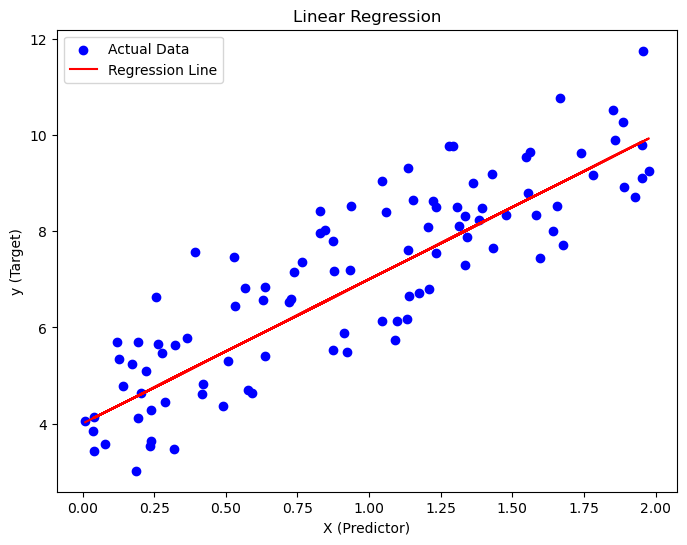

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit line
theta_0, theta_1 = 4, 3  # True parameters
y_pred = theta_0 + theta_1 * X

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('X (Predictor)')
plt.ylabel('y (Target)')
plt.legend()
plt.show()


---

# **Polynomial Regression**

### **Equation of Polynomial Regression**
Polynomial Regression is an extension of Linear Regression that models non-linear relationships by adding higher-degree terms of predictors:

```
y = theta_0 + theta_1 * x + theta_2 * x^2 + ... + theta_n * x^n
```

Where:
- Higher-degree terms like `x^2, x^3, ..., x^n` capture non-linear relationships.

For example, a degree-2 polynomial regression would look like:

```
y = theta_0 + theta_1 * x + theta_2 * x^2
```

---

### **Cost Function**
The cost function for Polynomial Regression remains the same as Linear Regression (Mean Squared Error):

```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2)
```

---

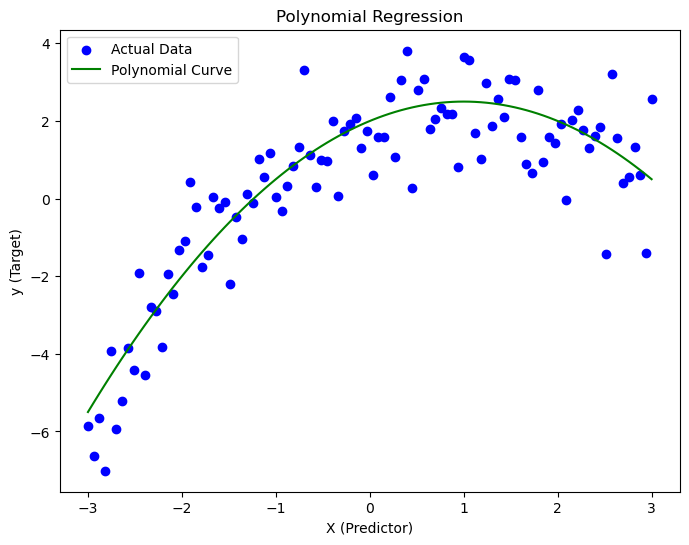

In [41]:
# Generate data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 + X - 0.5 * X**2 + np.random.randn(100, 1)

# Polynomial fit
theta_0, theta_1, theta_2 = 2, 1, -0.5
y_pred = theta_0 + theta_1 * X + theta_2 * X**2

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='green', label='Polynomial Curve')
plt.title('Polynomial Regression')
plt.xlabel('X (Predictor)')
plt.ylabel('y (Target)')
plt.legend()
plt.show()

---

# **Regularized Regression**

### **Introduction**
Regularization prevents overfitting by adding a penalty term to the cost function, which discourages large coefficients. Common methods include:

1. **Ridge Regression** (L2 Regularization)
2. **Lasso Regression** (L1 Regularization)

---

### **Ridge Regression**
Ridge Regression penalizes the sum of squared coefficients:

```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2) + lambda * sum(theta^2)
```

Where:
- `lambda`: Regularization parameter (controls the strength of the penalty).
- `sum(theta^2)`: Sum of squared coefficients (excluding `theta_0`).

---

### **Lasso Regression**
Lasso Regression penalizes the sum of absolute coefficients:

```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2) + lambda * sum(abs(theta))
```

Where:
- `sum(abs(theta))`: Sum of absolute values of coefficients (excluding `theta_0`).

Lasso can shrink some coefficients to exactly zero, effectively performing feature selection.

---

### **Elastic Net Regression**
Elastic Net combines both Ridge (L2) and Lasso (L1) penalties:

```
J(theta) = (1 / (2 * m)) * sum((y_pred - y_actual)^2) + lambda_1 * sum(abs(theta)) + lambda_2 * sum(theta^2)
```

Where:
- `lambda_1`: Controls the L1 penalty (Lasso).
- `lambda_2`: Controls the L2 penalty (Ridge).

---

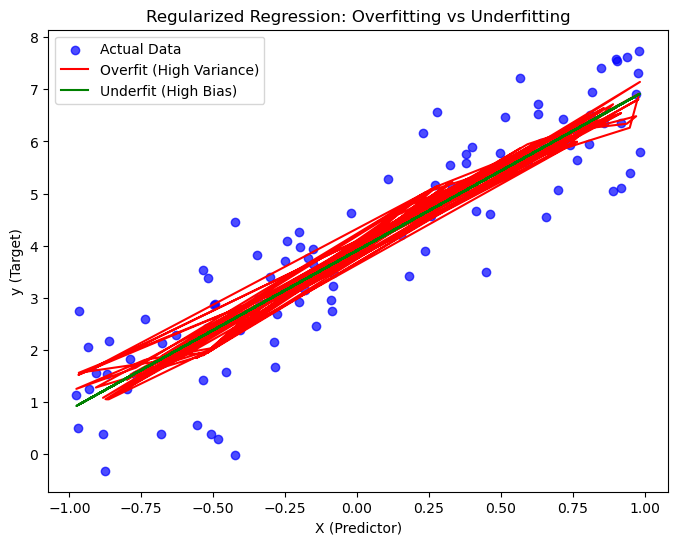

In [42]:
# Generate data
X = 2 * np.random.rand(100, 1) - 1
y = 4 + 3 * X + np.random.randn(100, 1)

# Overfit (high-degree polynomial)
theta_overfit = np.polyfit(X.flatten(), y.flatten(), deg=15)
y_overfit = np.polyval(theta_overfit, X.flatten())

# Underfit (low-degree polynomial)
theta_underfit = np.polyfit(X.flatten(), y.flatten(), deg=1)
y_underfit = np.polyval(theta_underfit, X.flatten())

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.7)
plt.plot(X, y_overfit, color='red', label='Overfit (High Variance)')
plt.plot(X, y_underfit, color='green', label='Underfit (High Bias)')
plt.title('Regularized Regression: Overfitting vs Underfitting')
plt.xlabel('X (Predictor)')
plt.ylabel('y (Target)')
plt.legend()
plt.show()


# Gradient Descent and Linear Regression Notes

## 1. Gradient Descent Derivations

### Partial Derivative with respect to \( w \)
The cost function \( J(\omega, b) \) is defined as:

$$
J(\omega, b) = \frac{1}{2m} \sum_{i=1}^m \left( f_{\omega, b}(x_i) - y_i \right)^2
$$

To compute the gradient with respect to \( \omega \):

$$
\frac{\partial}{\partial \omega} J(\omega, b) = \frac{\partial}{\partial \omega} \frac{1}{2m} \sum_{i=1}^m \left( \omega x_i + b - y_i \right)^2
$$

Simplify:

$$
\frac{\partial}{\partial \omega} J(\omega, b) = \frac{1}{m} \sum_{i=1}^m \left( \omega x_i + b - y_i \right) x_i
$$

### Partial Derivative with respect to \( b \)
Similarly, for \( b \):

$$
\frac{\partial}{\partial b} J(\omega, b) = \frac{\partial}{\partial b} \frac{1}{2m} \sum_{i=1}^m \left( \omega x_i + b - y_i \right)^2
$$

Simplify:

$$
\frac{\partial}{\partial b} J(\omega, b) = \frac{1}{m} \sum_{i=1}^m \left( \omega x_i + b - y_i \right)
$$

### Gradient Descent Updates
The gradient descent algorithm updates \( \omega \) and \( b \) as follows:

- **Update Rule for \( \omega \):**

$$
\omega = \omega - \alpha \frac{1}{m} \sum_{i=1}^m \left( f_{\omega, b}(x_i) - y_i \right) x_i
$$

- **Update Rule for \( b \):**

$$
 b = b - \alpha \frac{1}{m} \sum_{i=1}^m \left( f_{\omega, b}(x_i) - y_i \right)
$$

Here, \( \alpha \) is the **learning rate**.

---

## 2. Learning Rate Behavior
The learning rate \( \alpha \) determines the step size of gradient descent:

- **When \( \alpha \) is too small:**
  - Convergence is slow.
- **When \( \alpha \) is too large:**
  - The algorithm might overshoot the minimum and fail to converge.

At the local minimum, the gradient becomes zero, and the parameters \( \omega \) and \( b \) remain unchanged.

---

## 3. Gradient Descent Process

To minimize the cost function \( J(\omega, b) \):

1. Start with initial guesses for \( \omega \) and \( b \).
2. Compute the gradients:
   $$
   \frac{\partial}{\partial \omega} J(\omega, b) \quad \text{and} \quad \frac{\partial}{\partial b} J(\omega, b).
   $$
3. Update the parameters using the learning rate \( \alpha \):
   $$
   \omega = \omega - \alpha \frac{\partial}{\partial \omega} J(\omega, b), \quad b = b - \alpha \frac{\partial}{\partial b} J(\omega, b).
   $$
4. Repeat until convergence or a set number of iterations.

To ensure correct simultaneous updates, use temporary values:

$$
\text{temp}_{\omega} = \omega - \alpha \frac{\partial}{\partial \omega} J(\omega, b) \quad \text{and} \quad \text{temp}_{b} = b - \alpha \frac{\partial}{\partial b} J(\omega, b).
$$

Then update:

$$
\omega = \text{temp}_{\omega}, \quad b = \text{temp}_{b}.
$$

---

## 4. Cost Function for Linear Regression
The linear regression model is given by:

$$
 f_{\omega, b}(x) = \omega x + b
$$

The **cost function** measures the mean squared error (MSE):

$$
 J(\omega, b) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}_i - y_i \right)^2
$$

- \( \hat{y}_i \) is the prediction: \( \hat{y}_i = \omega x_i + b \).
- \( y_i \) is the true value.
- \( m \) is the number of training examples.

### Visual Representation
- **Slope (\( \omega \))** affects the steepness of the line.
- **Bias (\( b \))** shifts the line up or down.

### Best Point
The minimum of \( J(\omega, b) \) is where the gradient is zero:

$$
 \nabla J(\omega, b) = 0.
$$

---

## 5. Summary of Equations

- **Cost Function:**

$$
J(\omega, b) = \frac{1}{2m} \sum_{i=1}^m \left( \omega x_i + b - y_i \right)^2
$$

- **Gradients:**

$$
\frac{\partial J}{\partial \omega} = \frac{1}{m} \sum_{i=1}^m \left( \omega x_i + b - y_i \right) x_i
$$
$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m \left( \omega x_i + b - y_i \right)
$$

- **Parameter Updates:**

$$
\omega = \omega - \alpha \frac{\partial J}{\partial \omega}, \quad b = b - \alpha \frac{\partial J}{\partial b}.
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Generate Data
def generate_data(m=100):
    np.random.seed(42)
    x = np.random.rand(m, 1)
    y = 4 * x + 3 + np.random.randn(m, 1)
    return x, y

In [5]:
# Cost Function
# J(w, b) = (1 / 2m) * SUM((w*x_i + b - y_i)^2)
def compute_cost(x, y, w, b):
    m = len(y)
    predictions = w*x + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [6]:
# Gradient Descent (Simultaneously update w and b)
def gradient_descent(x, y, w, b, alpha, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        dw = (1 / m) * np.sum((w*x + b -y) * x)
        db = (1 / m) * np.sum(w*x + b - y)

        w -= alpha * dw
        b -= alpha * db

        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

        if i % 50 == 0:
            print(f"Iteration {i}: Cost = {cost}, w = {w}, b = {b}")

    return w, b, cost_history

In [7]:
# Main Execution

x, y = generate_data()

alpha = 0.1
iterations = 1000
w_init, b_init = 0.0, 0.0

print("Starting Gradient Descent")
w_final, b_final, cost_history = gradient_descent(x, y, w_init, b_init, alpha, iterations)
print(f"Final Parameters: w = {w_final}, b = {b_final}")

Starting Gradient Descent
Iteration 0: Cost = 9.987647342472641, w = 0.2604490783657392, b = 0.48796426133454807
Iteration 50: Cost = 0.45329400511991114, w = 2.4773969595553473, b = 3.746958068180428
Iteration 100: Cost = 0.42785989546116177, w = 2.796773582702889, b = 3.591270440647192
Iteration 150: Cost = 0.4153673932039502, w = 3.0190130569316844, b = 3.478826757582072
Iteration 200: Cost = 0.4092272626565726, w = 3.174817203151906, b = 3.3999909254160245
Iteration 250: Cost = 0.4062093561989468, w = 3.284047492340414, b = 3.3447211387619116
Iteration 300: Cost = 0.40472603930255474, w = 3.360626047513765, b = 3.3059729084013765
Iteration 350: Cost = 0.40399698124657596, w = 3.4143133091361455, b = 3.2788075175675826
Iteration 400: Cost = 0.4036386453776323, w = 3.4519520717634298, b = 3.2597625585517487
Iteration 450: Cost = 0.40346252141340366, w = 3.478339643215249, b = 3.2464106260824552
Iteration 500: Cost = 0.4033759555586737, w = 3.496839293005013, b = 3.237049928560536
Ite

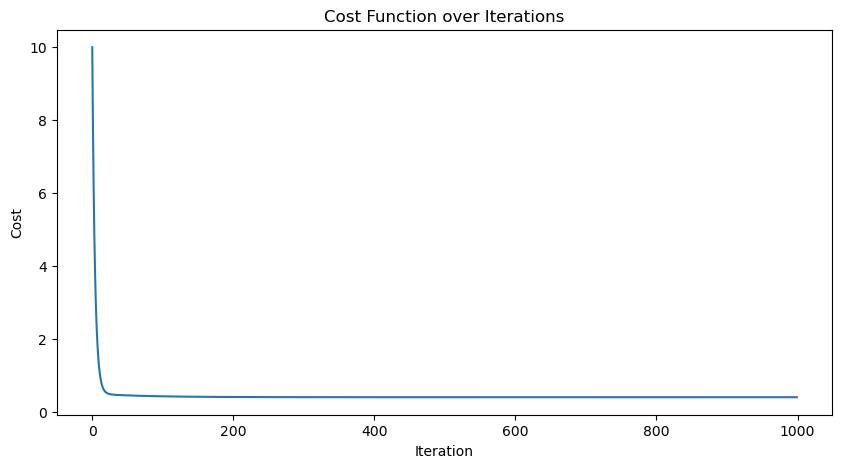

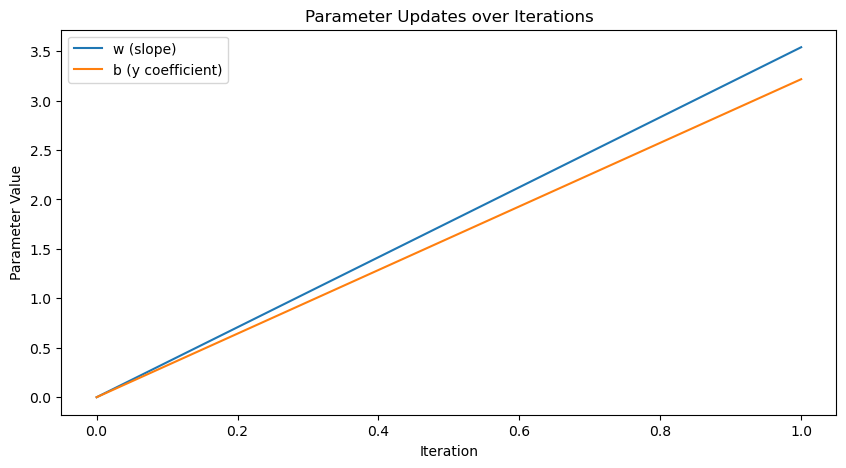

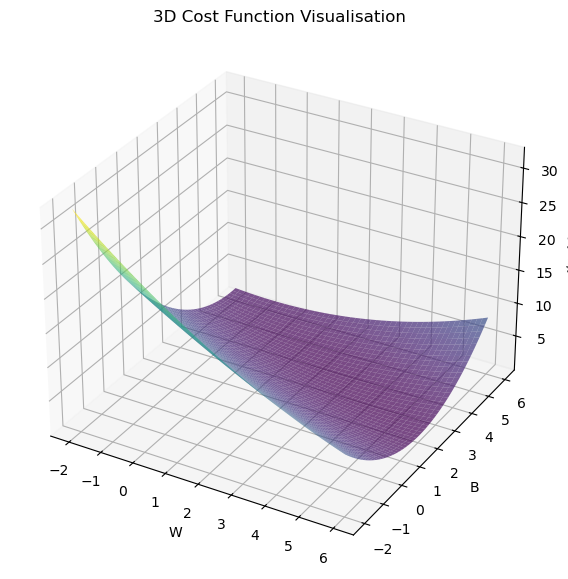

In [9]:
# Visualisation
def visualise(x, y, w_history, b_history, cost_history):
    # Cost History
    plt.figure(figsize=(10, 5))
    plt.plot(cost_history)
    plt.title("Cost Function over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

    # Trajectory of w, b over iterations
    plt.figure(figsize=(10, 5))
    plt.plot(w_history, label="w (slope)")
    plt.plot(b_history, label="b (y coefficient)")
    plt.title("Parameter Updates over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Parameter Value")
    plt.legend()
    plt.show()

    # 3D Visualisation of Cost Function
    w_range = np.linspace(-2, 6, 50)
    b_range = np.linspace(-2, 6, 50)
    J = np.zeros((len(w_range), len(b_range)))
    for i, w in enumerate(w_range):
        for j, b in enumerate(b_range):
            J[i, j] = compute_cost(x, y, w, b)
    W, B = np.meshgrid(w_range, b_range)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, J.T, cmap='viridis', alpha=0.7)
    ax.set_title("3D Cost Function Visualisation")
    ax.set_xlabel("W")
    ax.set_ylabel("B")
    ax.set_zlabel("J(w,b)")
    plt.show()

visualise(x, y, [w_init] + [w_final], [b_init] + [b_final], cost_history)

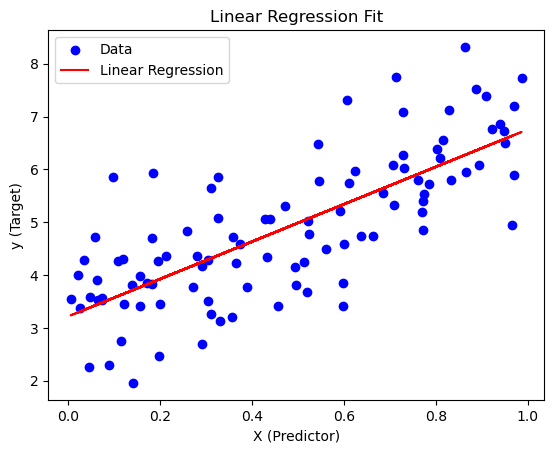

In [11]:
# Linear Regression Line Visualisation
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, w_final * x + b_final, color='red', label='Linear Regression')
plt.title('Linear Regression Fit')
plt.xlabel('X (Predictor)')
plt.ylabel('y (Target)')
plt.legend()
plt.show()